## Learning from Monte-Carlo Simulation
### Training neural net
Import modules

In [1]:
import numpy as np
import pandas as pd
from backpropagation import BackPropagation


Create training set from the simulation result

In [2]:
data = pd.read_excel('training_set.xlsx')

#data.head()
training_set = []
for index, row in data.iterrows():
    features = row.iloc[:20].tolist()  
    result = row.iloc[-10:].tolist() 
    training_set.append((features, result))
    
training_set

[([0.021,
   0.09,
   0.259,
   0.342,
   0.211,
   0.062,
   0.011,
   0.002,
   0.002,
   0.0,
   0.051,
   0.212,
   0.461,
   0.234,
   0.034,
   0.007,
   0.001,
   0.0,
   0.0,
   0.0],
  [0.489, 0.491, 0.018, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([0.027,
   0.102,
   0.258,
   0.355,
   0.182,
   0.062,
   0.009,
   0.004,
   0.0,
   0.001,
   0.048,
   0.233,
   0.468,
   0.207,
   0.037,
   0.006,
   0.001,
   0.0,
   0.0,
   0.0],
  [0.473, 0.504, 0.023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([0.024,
   0.087,
   0.246,
   0.378,
   0.201,
   0.05,
   0.009,
   0.003,
   0.002,
   0.0,
   0.042,
   0.232,
   0.465,
   0.219,
   0.036,
   0.006,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.468, 0.513, 0.019, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([0.027,
   0.083,
   0.267,
   0.355,
   0.201,
   0.047,
   0.014,
   0.005,
   0.001,
   0.0,
   0.052,
   0.24,
   0.475,
   0.195,
   0.031,
   0.005,
   0.002,
   0.0,
   0.0,
   0.0],
  [0.506, 0.477, 0.017, 0.0, 0.0, 0.0, 0.0, 0.0,

Learn multilayered neural network with a given training set

In [3]:
bpnn = BackPropagation(training_set,[20, 15, 15, 10], [0.3, 0.3, 0.3], 10000)
bpnn.backpropagation()
for row in training_set:
    net_input = row[0]
    bpnn.feed_forward(net_input)
    net_output = bpnn.output_activation.reshape([1,10])
    print("Input: ", net_input, " Output: ", net_output.flatten().tolist())

Input:  [0.021, 0.09, 0.259, 0.342, 0.211, 0.062, 0.011, 0.002, 0.002, 0.0, 0.051, 0.212, 0.461, 0.234, 0.034, 0.007, 0.001, 0.0, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0]
Input:  [0.027, 0.102, 0.258, 0.355, 0.182, 0.062, 0.009, 0.004, 0.0, 0.001, 0.048, 0.233, 0.468, 0.207, 0.037, 0.006, 0.001, 0.0, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0]
Input:  [0.024, 0.087, 0.246, 0.378, 0.201, 0.05, 0.009, 0.003, 0.002, 0.0, 0.042, 0.232, 0.465, 0.219, 0.036, 0.006, 0.0, 0.0, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0]
Input:  [0.027, 0.083, 0.267, 0.355, 0.201, 0.047, 0.014, 0.005, 0.001, 0.0, 0.052, 0.24, 0.475, 0.195, 0.031, 0.005, 0.002, 0.0, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0]
Input:  [0.031, 0.096, 0.29, 0.33, 0.19, 0.044, 0.016, 0.002, 0.0, 0.001, 0.049, 0.205, 0.496, 0.201, 0.042, 0.005, 0.002, 0.0, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.01, 0.0

Draw the history of learning

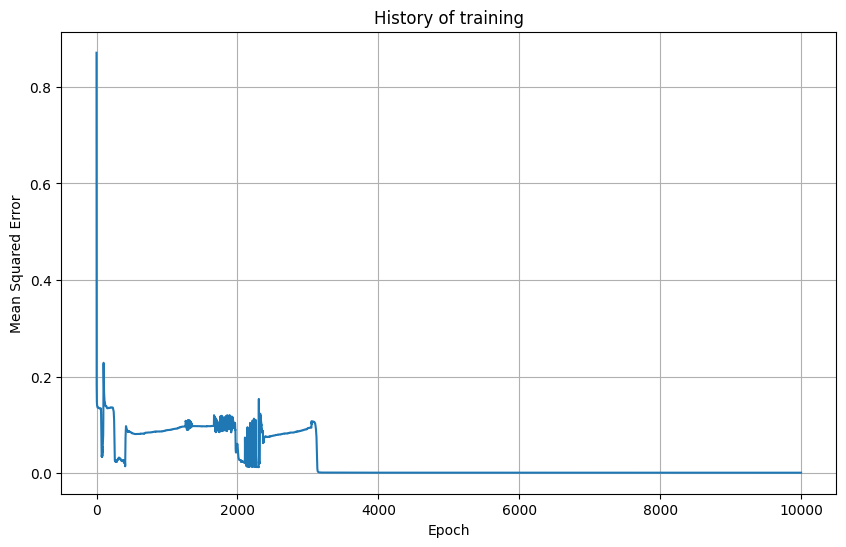

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(bpnn.history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('History of training')
plt.grid(True)
plt.show()

### Mean squared error

In [5]:
error = bpnn.calculate_mean_squared_error()
print("Means squared error: ", error)

Means squared error:  0.0012134434592632162


### Max error of the single output neuron for a training net

In [6]:
max_error = bpnn.calculate_max_error()
print("Max error of the single output neuron: ", max_error)

Max error of the single output neuron:  0.04899999999999999


### Find solution for examples

In [8]:
input_data = pd.read_excel('inference_set.xlsx')
input_data.head()
input_set = []
for index, row in input_data.iterrows():
    features = row.iloc[:20].tolist()
    input_set.append(features)

output_set = []
for net_input in input_set:
    net_output = bpnn.run(net_input)
    output_set.append(net_output)
    print("Input: ", net_input, " Output: ", net_output)
# Create a DataFrame for the output data

header = list(data.columns)
output_data = pd.DataFrame(columns=header)

for i in range(len(input_set)):
    row = input_set[i] + output_set[i]
    output_data.loc[i] = row

output_data.to_excel('result_set.xlsx', index=False)
output_data

Input:  [0.021, 0.09, 0.259, 0.342, 0.211, 0.062, 0.011, 0.002, 0.002, 0.0, 0.051, 0.212, 0.461, 0.234, 0.034, 0.007, 0.001, 0.0, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0]
Input:  [0.181, 0.315, 0.313, 0.152, 0.033, 0.003, 0.003, 0.0, 0.0, 0.0, 0.045, 0.23, 0.479, 0.197, 0.043, 0.004, 0.001, 0.001, 0.0, 0.0]  Output:  [0.21, 0.42, 0.19, 0.09, 0.05, 0.02, 0.0, 0.0, 0.0, 0.0]
Input:  [0.273, 0.339, 0.268, 0.099, 0.015, 0.006, 0.0, 0.0, 0.0, 0.0, 0.63, 0.282, 0.076, 0.011, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0]  Output:  [0.92, 0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


,0-0.3,0.3-0.6,0.6-0.9,0.9-1.2,1.2-1.5,1.5-1.8,1.8-2.1,2.1-2.4,2.4-2.7,2.7-3.0,...,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
0,0.021,0.090,0.259,0.342,0.211,0.062,0.011,0.002,0.002,0.0,...,0.48,0.50,0.02,0.00,0.00,0.01,0.0,0.0,0.0,0.0
1,0.181,0.315,0.313,0.152,0.033,0.003,0.003,0.000,0.000,0.0,...,0.21,0.42,0.19,0.09,0.05,0.02,0.0,0.0,0.0,0.0
2,0.273,0.339,0.268,0.099,0.015,0.006,0.000,0.000,0.000,0.0,...,0.92,0.08,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
